Lambda School Data Science

*Unit 4, Sprint 1, Module 3*

---

# Document Classification (Assignment)

This notebook is for you to practice skills during lecture.

Today's guided module project and assignment will be different. You already know how to do classification. You ready know how to extract features from documents. So? That means you're ready to combine and practice those skills in a kaggle competition. We we will open with a five minute sprint explaining the competition, and then give you 25 minutes to work. After those twenty five minutes are up, I will give a 5-minute demo an NLP technique that will help you with document classification (*and **maybe** the competition*).

Today's all about having fun and practicing your skills.

## Sections
* <a href="#p1">Part 1</a>: Text Feature Extraction & Classification Pipelines
* <a href="#p2">Part 2</a>: Latent Semantic Indexing
* <a href="#p3">Part 3</a>: Word Embeddings with Spacy
* <a href="#p4">Part 4</a>: Post Lecture Assignment

# Text Feature Extraction & Classification Pipelines (Learn)
<a id="p1"></a>

## Follow Along 

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model (try using the pipe method I just demoed)

### Load Competition Data

In [1]:
import pandas as pd

# You may need to change the path
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [2]:
train.head()

,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few lef...",1
1,3861,\nAn uncommon exclusive bottling of a 6 year o...,0
2,655,\nThis release is a port version of Amrut’s In...,1
3,555,\nThis 41 year old single cask was aged in a s...,1
4,1965,"\nQuite herbal on the nose, with aromas of dri...",1


### Define Pipeline Components

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=.03)
clf = RandomForestClassifier()

pipe = Pipeline([('vect', vect), ('clf', clf)])

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [4]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'vect__min_df': (.02, .03, .04, .05),
    'vect__max_df': (0.75, 0.90, 1.0),
    'vect__max_features': (500, 750, 1000),
    'clf__max_depth':(5,10,15,20),
    'clf__n_estimators': (5, 10)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=4, verbose=1)
grid_search.fit(train['description'], train['ratingCategory'])

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   24.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  6.3min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 10.4min
[Parallel(n_jobs=4)]: Done 1440 out of 1440 | elapsed: 12.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=0.03,
                                                        ngram_range=(1, 2),
                                                       

In [5]:
grid_search.best_score_

0.7198433053122372

In [7]:
grid_search.best_params_

{'clf__max_depth': 15,
 'clf__n_estimators': 10,
 'vect__max_df': 1.0,
 'vect__max_features': 500,
 'vect__min_df': 0.02}

### Make a Submission File
*Note:* In a typical Kaggle competition, you are only allowed two submissions a day, so you only submit if you feel you cannot achieve higher test accuracy. For this competition the max daily submissions are capped at **20**. Submit for each demo and for your assignment. 

In [8]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [9]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [11]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [12]:
subNumber = 0

In [13]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission1.csv', index=False)
subNumber += 1

## Challenge

You're trying to achieve a minimum of 70% Accuracy on your model.

## Latent Semantic Indexing (Learn)
<a id="p2"></a>

## Follow Along
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
4. Make a submission to Kaggle 


### Define Pipeline Components

In [15]:
from sklearn.decomposition import TruncatedSVD


vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=.03)
svd = TruncatedSVD(n_components=100, 
                   algorithm='randomized',
                   n_iter=10)

lsi = Pipeline([('vect', vect), ('svd', svd)])
clf = RandomForestClassifier(max_depth=15, n_estimators=10, n_jobs=-1)

pipe = Pipeline([('lsi', lsi), ('clf', clf)])

print(pipe)

Pipeline(memory=None,
         steps=[('lsi',
                 Pipeline(memory=None,
                          steps=[('vect',
                                  TfidfVectorizer(analyzer='word', binary=False,
                                                  decode_error='strict',
                                                  dtype=<class 'numpy.float64'>,
                                                  encoding='utf-8',
                                                  input='content',
                                                  lowercase=True, max_df=1.0,
                                                  max_features=None,
                                                  min_df=0.03,
                                                  ngram_range=(1, 2), norm='l2',
                                                  preprocessor=None,
                                                  smooth_idf=True,
                                                  stop_words='english',
    

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [16]:

parameters = {
    'lsi__svd__n_components': [10,100,250],
    'lsi__vect__max_df': (0.75, .9, 1.0),
    'lsi__vect__min_df': (.03, .05, .07),
    'clf__max_depth':(5,10,15,20),
    'clf__n_estimators': (5, 10, 15)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=4, verbose=1)
grid_search.fit(train['description'], train['ratingCategory'])

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   28.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  7.3min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 11.3min
[Parallel(n_jobs=4)]: Done 1620 out of 1620 | elapsed: 14.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lsi',
                                        Pipeline(memory=None,
                                                 steps=[('vect',
                                                         TfidfVectorizer(analyzer='word',
                                                                         binary=False,
                                                                         decode_error='strict',
                                                                         dtype=<class 'numpy.float64'>,
                                                                         encoding='utf-8',
                                                                         input='content',
                                                                         lowercase=True,
                                                                         max_df=1.0,
             

In [17]:
grid_search.best_score_

0.7203364925647833

In [18]:

grid_search.best_params_

{'clf__max_depth': 5,
 'clf__n_estimators': 10,
 'lsi__svd__n_components': 10,
 'lsi__vect__max_df': 0.9,
 'lsi__vect__min_df': 0.03}

### Make a Submission File

In [20]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [21]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [22]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [23]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

Continue to apply Latent Semantic Indexing (LSI) to various datasets. 

# Word Embeddings with Spacy (Learn)
<a id="p3"></a>

## Follow Along

In [24]:
# Apply to your Dataset

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from scipy.stats import randint

param_dist = {
    
    'max_depth' : randint(3,10),
    'min_samples_leaf': randint(2,15)
}

In [25]:
# Continue Word Embedding Work Here
import spacy
nlp = spacy.load("en_core_web_lg")

In [26]:
train['description'] = train['description'].astype(str)


In [27]:
def get_word_vectors(docs):
    return [nlp(doc).vector for doc in docs]

X_train = get_word_vectors(train['description'])

len(X_train) == len(train['description'])

True

In [28]:
type(X_train)

list

In [29]:
param_dist = {
    
    'max_depth' : randint(3,10),
    'min_samples_leaf': randint(2,15),
    'n_jobs': -1
}

rfc = RandomForestClassifier(**param_dist)

In [31]:
rfc.fit(X_train, train['ratingCategory'])


TypeError: '<' not supported between instances of 'float' and 'rv_frozen'

### Make a Submission File

In [ ]:
# Predictions on test sample
pred = ...predict(test['description'])

In [ ]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [ ]:
# Make Sure the Category is an Integer
submission.head()

In [ ]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
    - Try to extract word embeddings with Spacy and use those embeddings as your features for a classification model.
4. Make a submission to Kaggle 

# Post Lecture Assignment
<a id="p4"></a>

Your primary assignment this afternoon is to achieve a minimum of 70% accuracy on the Kaggle competition. Once you have achieved 70% accuracy, please work on the following: 

1. Research "Sentiment Analysis". Provide answers in markdown to the following questions: 
    - What is "Sentiment Analysis"? 
    - Is Document Classification different than "Sentiment Analysis"? Provide evidence for your response
    - How do create labeled sentiment data? Are those labels really sentiment?
    - What are common applications of sentiment analysis?
2. Research our why word embeddings worked better for the lecture notebook than on the whiskey competition.
    - This [text classification documentation](https://developers.google.com/machine-learning/guides/text-classification/step-2-5) from Google might be of interest
    - Neural Networks are becoming more popular for document classification. Why is that the case?

In [33]:
import pandas as pd
from sklearn.utils import resample

# path to read data
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

minority = train[train['ratingCategory'] == 0]
majority = train[train['ratingCategory'] == 1]

df_minority_upsampled = resample(minority,
                                 replace=True,
                                 n_samples=majority.shape[0]
                                )

df_upsampled = pd.concat([majority, df_minority_upsampled])

In [34]:
train.head()


,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few lef...",1
1,3861,\nAn uncommon exclusive bottling of a 6 year o...,0
2,655,\nThis release is a port version of Amrut’s In...,1
3,555,\nThis 41 year old single cask was aged in a s...,1
4,1965,"\nQuite herbal on the nose, with aromas of dri...",1


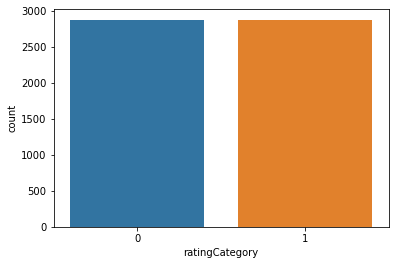

In [35]:

import seaborn as sns

sns.countplot(x='ratingCategory', data=df_upsampled);

In [36]:
train['ratingCategory'].value_counts()


1    2881
0    1141
2      65
Name: ratingCategory, dtype: int64

In [37]:
df_upsampled['ratingCategory'].value_counts()


1    2881
0    2881
Name: ratingCategory, dtype: int64

In [38]:
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
clf = RandomForestClassifier(n_jobs=-1)

pipe = Pipeline([('vect', vect), ('clf', clf)])


In [39]:
params = {
    'vect__max_df': (.75, .9, 1),
    'vect__min_df': (.03, .05, .1),
    'clf__max_depth': (5, 10, 15, 20)
}

grid_search = GridSearchCV(pipe, params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(df_upsampled['description'], df_upsampled['ratingCategory'])

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        no

In [40]:
grid_search.best_score_


0.87556615592175

In [41]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(train['description'])

acc_score = accuracy_score(train['ratingCategory'], y_pred)

print(f'Accuracy Score: {(acc_score)*100}%')

Accuracy Score: 95.20430633716663%


In [42]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [43]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory': pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')


In [45]:
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,0
3,3764,1
4,2306,1


In [46]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1


Want to improve the model by using upsample

In [47]:
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=.03)
svd = TruncatedSVD(n_components=100, 
                   algorithm='randomized',
                   n_iter=10,
                   random_state=3
                  )

lsi = Pipeline([('vect', vect), ('svd', svd)])
clf = RandomForestClassifier(max_depth=15, n_estimators=10, n_jobs=-1, random_state=3)

pipe = Pipeline([('lsi', lsi), ('clf', clf)])

print(pipe)

Pipeline(memory=None,
         steps=[('lsi',
                 Pipeline(memory=None,
                          steps=[('vect',
                                  TfidfVectorizer(analyzer='word', binary=False,
                                                  decode_error='strict',
                                                  dtype=<class 'numpy.float64'>,
                                                  encoding='utf-8',
                                                  input='content',
                                                  lowercase=True, max_df=1.0,
                                                  max_features=None,
                                                  min_df=0.03,
                                                  ngram_range=(1, 2), norm='l2',
                                                  preprocessor=None,
                                                  smooth_idf=True,
                                                  stop_words='english',
    

In [ ]:
parameters = {
    'lsi__svd__n_components': [10,100,250],
    'lsi__svd__n_iter': (5, 10),
    'lsi__vect__max_df': (0.75, 0.85, 0.95),
    'lsi__vect__min_df': (.03, .05, .07),
    'clf__max_depth':(5,10,15,20),
    'clf__n_estimators': (10, 15, 25),
    'clf__min_samples_leaf': (2, 3, 4)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=4, verbose=1)
grid_search.fit(df_upsampled['description'], df_upsampled['ratingCategory'])

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   34.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 10.2min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 15.1min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 21.1min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 28.3min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 36.9min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 46.4min
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed: 57.1min
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed: 69.5min
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed: 82.3min
[Parallel(n_jobs=4)]: Done 8442 tasks      | elapsed: 94.8min


In [63]:
grid_search.best_score_


0.7257184583110131

In [64]:
grid_search.best_params_


{'clf__max_depth': 25,
 'clf__n_estimators': 30,
 'lsi__svd__n_components': 100,
 'lsi__vect__max_df': 0.75,
 'lsi__vect__min_df': 0.02,
 'lsi__vect__ngram_range': (1, 1)}

In [65]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(train['description'])

acc_score = accuracy_score(train['ratingCategory'], y_pred)

print(f'Accuracy Score: {(acc_score)*100}%')

Accuracy Score: 98.16491313922192%


In [66]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [67]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory': pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [68]:
submission.head()


,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [69]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

In [70]:
""" READ THE DATA """

import pandas as pd

# You may need to change the path
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

print(train.head())

""" MAKE THE PIPELINE """

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=.03, max_df=.8)
svd = TruncatedSVD(n_components=100, 
                   algorithm='randomized',
                   n_iter=10)

lsi = Pipeline([('vect', vect), ('svd', svd)])
clf = RandomForestClassifier(max_depth=20, n_estimators=25, min_samples_leaf=2, n_jobs=-1, random_state=3)

pipe = Pipeline([('lsi', lsi), ('clf', clf)])

print(pipe)

     id                                        description  ratingCategory
0  1321  \nSometimes, when whisky is batched, a few lef...               1
1  3861  \nAn uncommon exclusive bottling of a 6 year o...               0
2   655  \nThis release is a port version of Amrut’s In...               1
3   555  \nThis 41 year old single cask was aged in a s...               1
4  1965  \nQuite herbal on the nose, with aromas of dri...               1
Pipeline(memory=None,
         steps=[('lsi',
                 Pipeline(memory=None,
                          steps=[('vect',
                                  TfidfVectorizer(analyzer='word', binary=False,
                                                  decode_error='strict',
                                                  dtype=<class 'numpy.float64'>,
                                                  encoding='utf-8',
                                                  input='content',
                                                  low

In [71]:

""" RUN GRID SEARCH CV """

# from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {
    'lsi__svd__n_components': [100,150],
    'lsi__vect__max_df': (0.75, .8, .85),
    'lsi__vect__min_df': (.02, .03),
    'lsi__vect__ngram_range': ((1,1), (1,2), (1,3)),
    'clf__max_depth':(20, 25),
    'clf__n_estimators': (20, 25, 30)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=-1, verbose=1) #random_state=3)
grid_search.fit(train['description'], train['ratingCategory'])

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 21.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lsi',
                                        Pipeline(memory=None,
                                                 steps=[('vect',
                                                         TfidfVectorizer(analyzer='word',
                                                                         binary=False,
                                                                         decode_error='strict',
                                                                         dtype=<class 'numpy.float64'>,
                                                                         encoding='utf-8',
                                                                         input='content',
                                                                         lowercase=True,
                                                                         max_df=0.8,
             

In [72]:
grid_search.best_params_


{'clf__max_depth': 20,
 'clf__n_estimators': 30,
 'lsi__svd__n_components': 100,
 'lsi__vect__max_df': 0.75,
 'lsi__vect__min_df': 0.03,
 'lsi__vect__ngram_range': (1, 3)}

In [73]:
grid_search.best_score_


0.7240054705479226

Try to improve model by using LSI, XGBoost, and RandomizedSearchCV¶


In [74]:
pip install xgboost


In [75]:

""" READ THE DATA """

import pandas as pd

# You may need to change the path
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

print(train.head())

""" MAKE THE PIPELINE (XGBOOST) """

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=.03, max_df=.8)
svd = TruncatedSVD(n_components=100, 
                   algorithm='randomized',
                   n_iter=10)

lsi = Pipeline([('vect', vect), ('svd', svd)])
clf = XGBClassifier() # max_depth=20, n_estimators=100, min_samples_leaf=2, random_state=3)

pipe = Pipeline([('lsi', lsi), ('clf', clf)])

print(pipe)

     id                                        description  ratingCategory
0  1321  \nSometimes, when whisky is batched, a few lef...               1
1  3861  \nAn uncommon exclusive bottling of a 6 year o...               0
2   655  \nThis release is a port version of Amrut’s In...               1
3   555  \nThis 41 year old single cask was aged in a s...               1
4  1965  \nQuite herbal on the nose, with aromas of dri...               1
Pipeline(memory=None,
         steps=[('lsi',
                 Pipeline(memory=None,
                          steps=[('vect',
                                  TfidfVectorizer(analyzer='word', binary=False,
                                                  decode_error='strict',
                                                  dtype=<class 'numpy.float64'>,
                                                  encoding='utf-8',
                                                  input='content',
                                                  low

In [77]:
"""Run randomized search cv"""

from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import GridSearchCV

parameters = {
    'lsi__svd__n_components': [100,150],
    'lsi__vect__max_df': (0.75, .8, .85),
    'lsi__vect__min_df': (.02, .03),
    'lsi__vect__ngram_range': ((1,1), (1,2), (1,3))
    #'clf__max_depth':(20, 25),
    #'clf__n_estimators': (20, 25, 30)
}

random_search = RandomizedSearchCV(pipe,parameters, cv=5, n_jobs=-1, verbose=1) #random_state=3)
random_search.fit(train['description'], train['ratingCategory'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 10.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('lsi',
                                              Pipeline(memory=None,
                                                       steps=[('vect',
                                                               TfidfVectorizer(analyzer='word',
                                                                               binary=False,
                                                                               decode_error='strict',
                                                                               dtype=<class 'numpy.float64'>,
                                                                               encoding='utf-8',
                                                                               input='content',
                                                                               lowercase=True,
                          

In [78]:
random_search.best_params_


{'lsi__vect__ngram_range': (1, 2),
 'lsi__vect__min_df': 0.02,
 'lsi__vect__max_df': 0.8,
 'lsi__svd__n_components': 100}

In [79]:
random_search.best_score_


0.7266997453262427

In [80]:
# Predictions on test sample
pred = random_search.predict(test['description'])

# Create the submission dataframe
submission = pd.DataFrame({'id': test['id'], 'ratingCategory': pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [81]:
submission.head()


,id,ratingCategory
0,3461,1
1,2604,1
2,3341,0
3,3764,1
4,2306,1


In [82]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

Try to improve model by using upsampling, LSI, XGBoost, and RandomizedSearchCV¶

In [83]:
import pandas as pd
from sklearn.utils import resample

# path to read data
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

minority = train[train['ratingCategory'] == 0]
majority = train[train['ratingCategory'] == 1]

df_minority_upsampled = resample(minority,
                                 replace=True,
                                 n_samples=majority.shape[0]
                                )

df_upsampled = pd.concat([majority, df_minority_upsampled])

In [84]:
"""" MAKE THE PIPELINE (XGBOOST) """

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=.03, max_df=.8)
svd = TruncatedSVD(n_components=100, 
                   algorithm='randomized',
                   n_iter=10)

lsi = Pipeline([('vect', vect), ('svd', svd)])
clf = XGBClassifier() # max_depth=20, n_estimators=100, min_samples_leaf=2, random_state=3)

pipe = Pipeline([('lsi', lsi), ('clf', clf)])

print(pipe)

Pipeline(memory=None,
         steps=[('lsi',
                 Pipeline(memory=None,
                          steps=[('vect',
                                  TfidfVectorizer(analyzer='word', binary=False,
                                                  decode_error='strict',
                                                  dtype=<class 'numpy.float64'>,
                                                  encoding='utf-8',
                                                  input='content',
                                                  lowercase=True, max_df=0.8,
                                                  max_features=None,
                                                  min_df=0.03,
                                                  ngram_range=(1, 2), norm='l2',
                                                  preprocessor=None,
                                                  smooth_idf=True,
                                                  stop_words='english',
    

In [85]:
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import GridSearchCV

parameters = {
    'lsi__svd__n_components': [100,150],
    'lsi__vect__max_df': (0.75, .8, .85),
    'lsi__vect__min_df': (.02, .03),
    'lsi__vect__ngram_range': ((1,1), (1,2), (1,3))
    #'clf__max_depth':(20, 25),
    #'clf__n_estimators': (20, 25, 30)
}

random_search = RandomizedSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=1)
random_search.fit(df_upsampled['description'], df_upsampled['ratingCategory'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('lsi',
                                              Pipeline(memory=None,
                                                       steps=[('vect',
                                                               TfidfVectorizer(analyzer='word',
                                                                               binary=False,
                                                                               decode_error='strict',
                                                                               dtype=<class 'numpy.float64'>,
                                                                               encoding='utf-8',
                                                                               input='content',
                                                                               lowercase=True,
                          

In [86]:
from sklearn.metrics import accuracy_score

y_pred = random_search.predict(train['description'])

acc_score = accuracy_score(train['ratingCategory'], y_pred)

print(f'Accuracy Score: {(acc_score)*100}%')

Accuracy Score: 96.62344017616834%


In [87]:
# Predictions on test sample
pred = random_search.predict(test['description'])

In [88]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory': pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [89]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1
